In [1]:
from google.colab import drive
drive.mount("/content/drive/")
     

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
filepath= "/content/drive/MyDrive/Colab Notebooks/Dataset/archive (4).zip"

In [3]:
from zipfile import ZipFile

with ZipFile(filepath) as f:
  f.extractall("./veg")
  print("Data extracted")

Data extracted


In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image
import numpy as np

In [5]:
model = tf.keras.models.load_model("/content/drive/MyDrive/vegetablefile/vege1.h5")
classes = [
    "Bean",
    "Bitter_Gourd",
    "Bottle_Gourd",
    "Brinjal",
    "Broccoli",
    "Cabbage",
    "Capsicum",
    "Carrot",
    "Cauliflower",
    "Cucumber",
    "Papaya",
    "Potato",
    "Pumpkin",
    "Radish",
    "Tomato"
]
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 9)         684       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 9)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 18)        1476      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 18)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 27)          4401      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 27)        

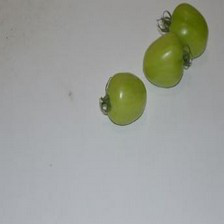

In [6]:
image=Image.open("/content/veg/Vegetable Images/test/Tomato/1001.jpg")
image

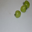

In [7]:
image=image.resize((32,32))
image

In [8]:
def Pred(final):
  image = Image.open(final)
  image = image.resize((32,32))
  test = tf.reshape(tf.constant(np.array(image)/255), (-1,32,32,3))
  preds = model.predict(test, verbose=False)[0]*100
  preds = tf.math.round(preds)
  confidence = tf.reduce_max(preds)
  index = int(tf.where(preds == confidence)[0][0])
  pred = classes[index]
  return f"The type of vegetable is {pred.title()} and it's confidence is {int(confidence)}%"
     

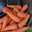

In [9]:

img = Image.open("/content/veg/Vegetable Images/test/Carrot/1001.jpg")
img = img.resize((32,32))
img



In [10]:
Pred("/content/veg/Vegetable Images/test/Bean/0003.jpg")

"The type of vegetable is Bean and it's confidence is 100%"

In [11]:
Pred("/content/veg/Vegetable Images/test/Cabbage/0929.jpg")


"The type of vegetable is Cabbage and it's confidence is 100%"

In [12]:
Pred("/content/veg/Vegetable Images/test/Tomato/1008.jpg")

"The type of vegetable is Tomato and it's confidence is 100%"

In [13]:
Pred("/content/veg/Vegetable Images/test/Carrot/1007.jpg")

"The type of vegetable is Carrot and it's confidence is 100%"

In [14]:
Pred("/content/veg/Vegetable Images/validation/Papaya/0821.jpg")

"The type of vegetable is Papaya and it's confidence is 100%"

In [15]:
Pred("/content/veg/Vegetable Images/test/Carrot/1001.jpg")

"The type of vegetable is Carrot and it's confidence is 100%"

In [19]:
Pred("/content/veg/Vegetable Images/test/Bean/0001.jpg")

"The type of vegetable is Bean and it's confidence is 98%"

In [20]:
Pred("/content/veg/Vegetable Images/test/Capsicum/1197.jpg")

"The type of vegetable is Tomato and it's confidence is 100%"